In [ ]:
import pandas as pd
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

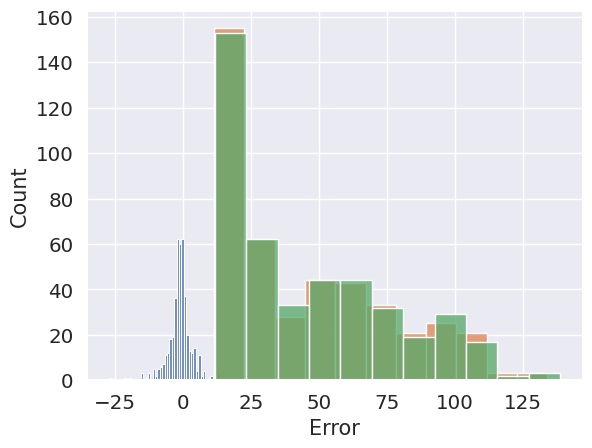

In [ ]:
# Read the data
data = pd.read_csv('/content/MR_Actual_Predicted_Error.csv')
#data=data1.iloc[350:438,:]
data.head()

data.describe()

sns.histplot(x='Error', data=data);

sns.histplot(x='Actual', data=data);

sns.histplot(x='Predicted', data=data);

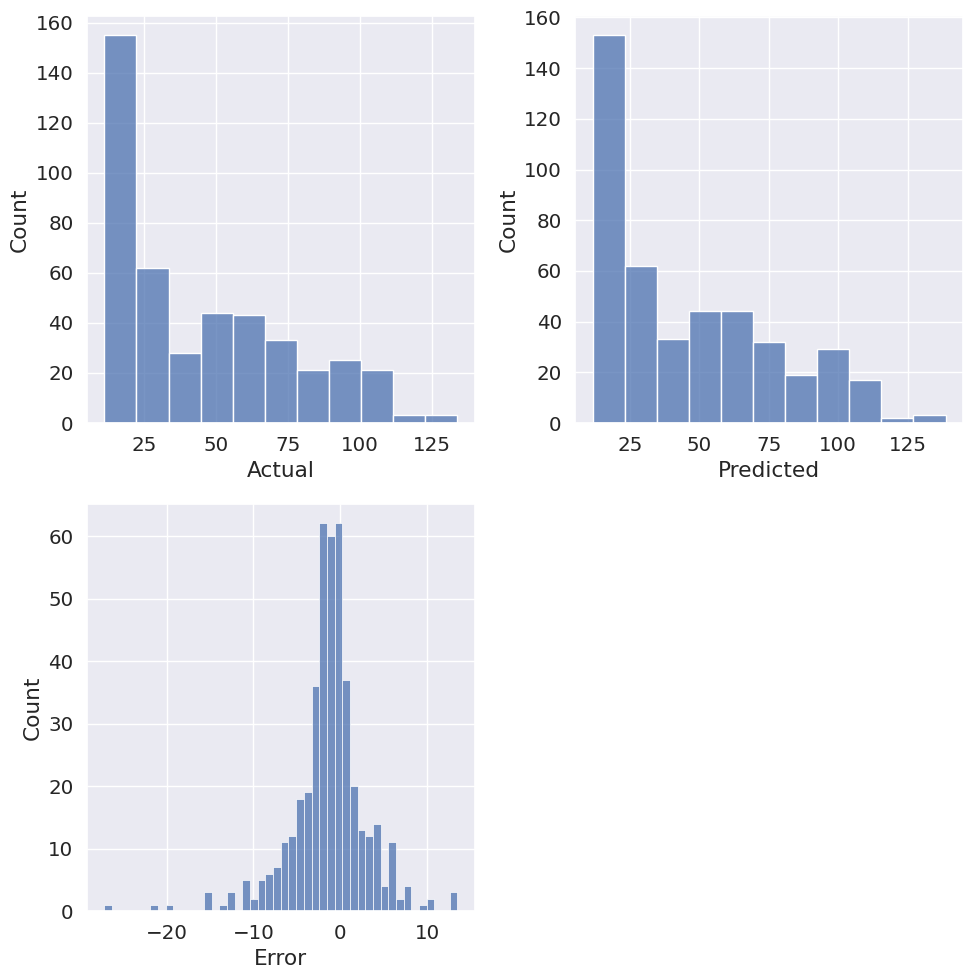

In [ ]:
cols = 2
rows = 2
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):

    ax=fig.add_subplot(rows,cols,i+1)

    sns.histplot(x = data[col], ax = ax)

fig.tight_layout()
plt.show()

<Axes: xlabel='Error', ylabel='Count'>

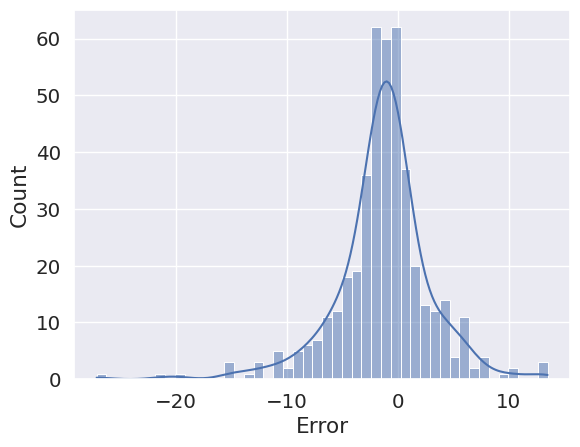

In [ ]:
#KDE plot — sns.kdeplot()
sns.histplot(x='Error', data=data, kde=True)

<Axes: xlabel='Error', ylabel='Count'>

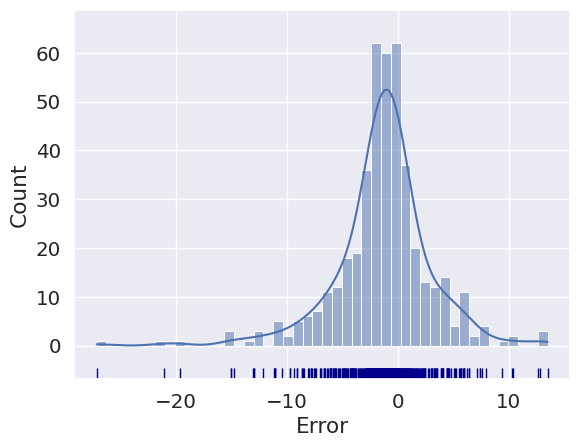

In [ ]:
#4. Rug plot — sns.rugplot()
sns.rugplot(x='Error', data=data, height=.03, color='darkblue')
sns.histplot(x='Error', data=data, kde=True)

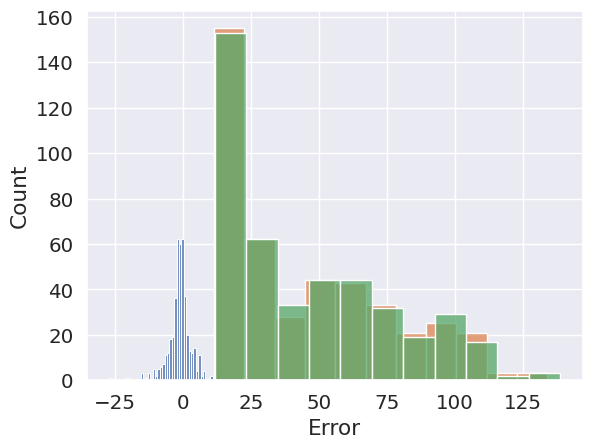

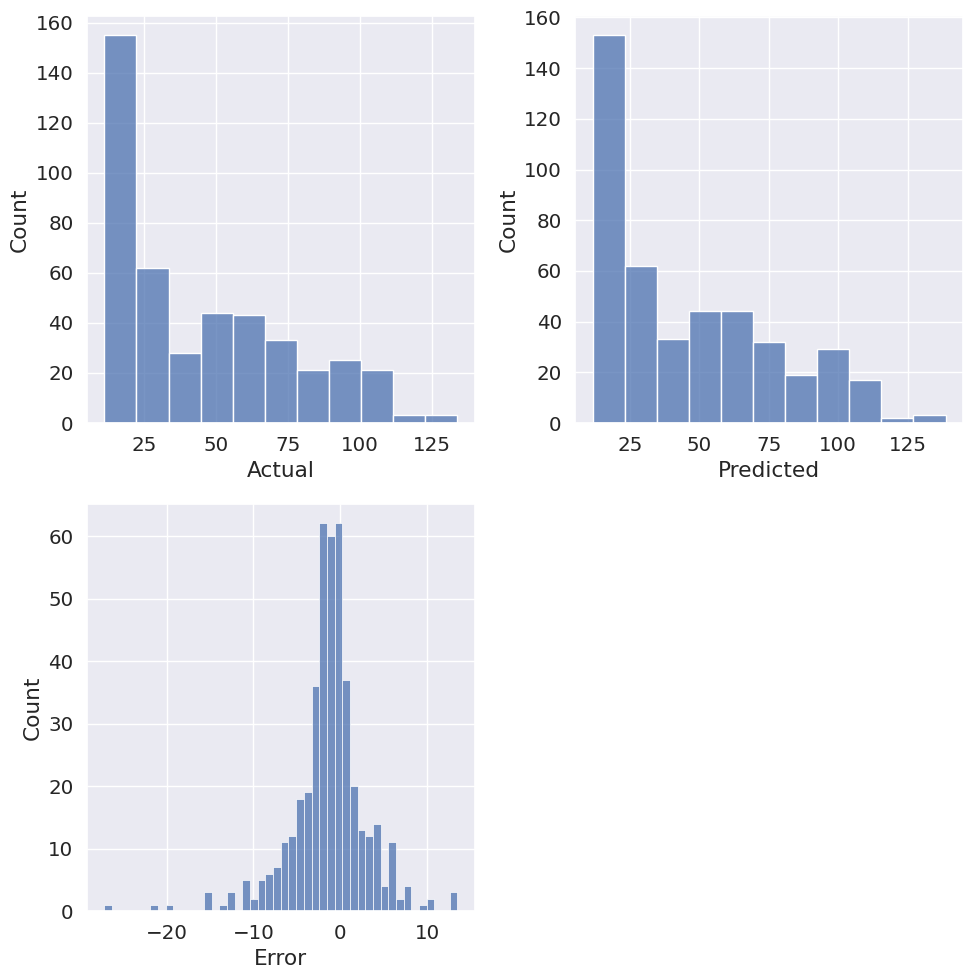

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.3 MB/s eta 0:00:00


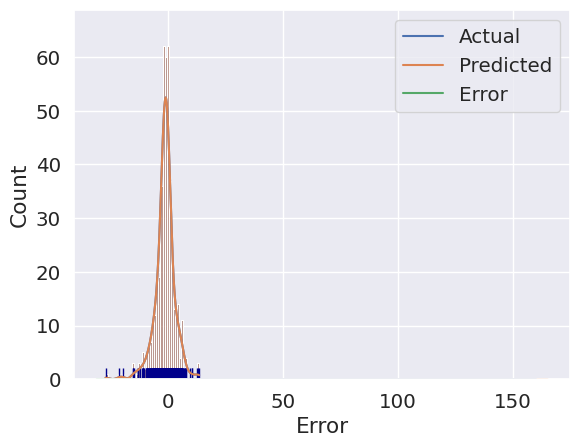

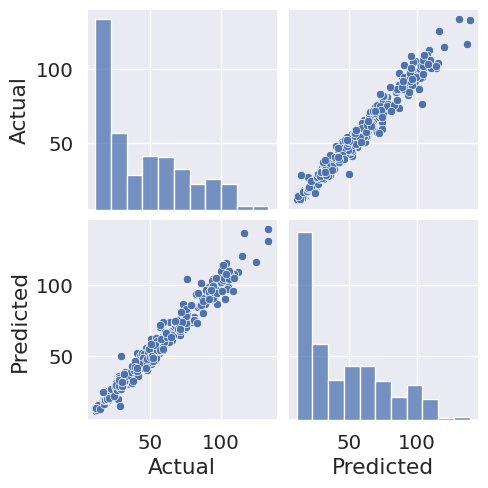

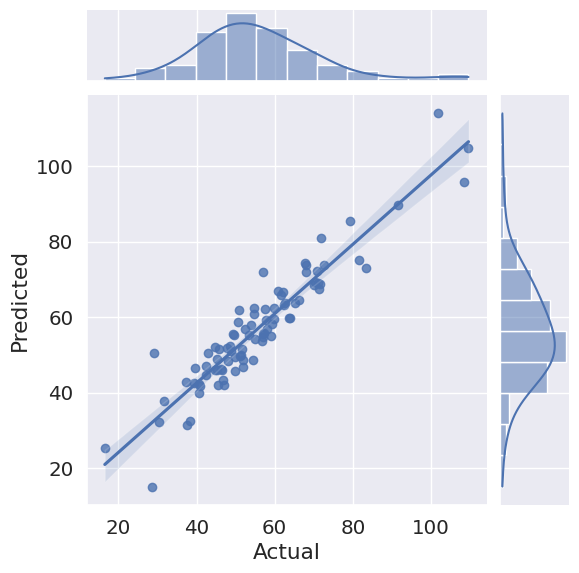

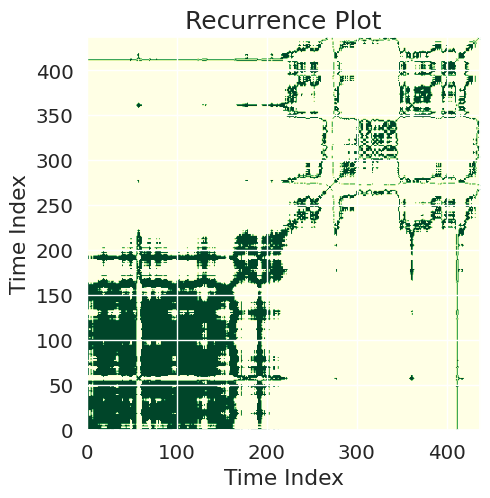

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 7.0 MB/s eta 0:00:00


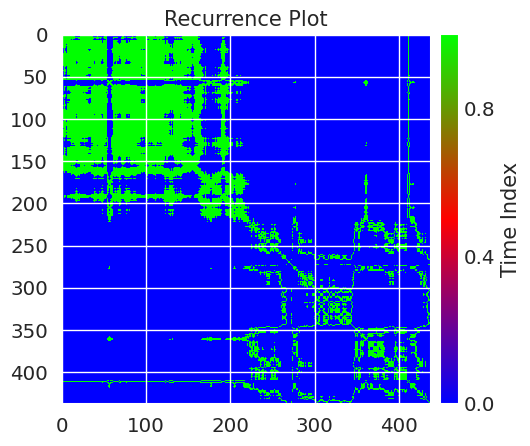

In [ ]:










sns.kdeplot(data=data)

sns.pairplot(data.iloc[:,0:2])

# Regression Plots on Test Set
sns.jointplot(x="Actual",y="Predicted",data=data.iloc[350:437,0:2],kind="reg")
plt.savefig('Joint_plot.png')

p=np.round(data.iloc[:,0])
p.unique()

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
!pip install pyts
from pyts.image import RecurrencePlot

# Load the GunPoint dataset
#data2=np.round(data)
X=data.T
# Get the recurrence plots for all the time series
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)
# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_rp[0], cmap='YlGn', origin='lower')
plt.title('Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.xlabel( "Time Index")
# Set label for y-axis
plt.ylabel( "Time Index")
plt.savefig('Recurrence_plot1.png')
plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import RecurrencePlot
!pip install -U seaborn-image
import seaborn_image as isns
# Load the GunPoint dataset
#data2=np.round(data)
X=data.T
# Get the recurrence plots for all the time series
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(X)
# Show the results for the first time series
isns.imgplot(X_rp[0],cmap='brg',showticks=True,alpha=1).set(title='Recurrence Plot')
# Set label for x-axis
#plt.xlabel( "Time Index")
# Set label for y-axis
plt.ylabel( "Time Index")
plt.savefig('Recurrence_plot.png')



In [ ]:
#Calculate different confidence intervals with Gaussian Distribution
location=0
Scale=5
#conf95=find_confidence_interval_t_location_scale(0.95,location,Scale,error,ForecastedData)
conf90=find_confidence_interval_t_location_scale(0.90,location,Scale,error,ForecastedData)
conf80=find_confidence_interval_t_location_scale(0.80,location,Scale,error,ForecastedData)
conf70=find_confidence_interval_t_location_scale(0.70,location,Scale,error,ForecastedData)
conf60=find_confidence_interval_t_location_scale(0.60,location,Scale,error,ForecastedData)
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
#ax.fill_between(conf95.index,conf95.iloc[:,0],conf95.iloc[:,1], color='#ff0000',label='95%')
ax.fill_between(conf90.index,conf90.iloc[:,0],conf90.iloc[:,1], color='#cf0000',label='90%')
ax.fill_between(conf80.index,conf80.iloc[:,0],conf80.iloc[:,1], color='#af0000',label='80%')
ax.fill_between(conf90.index,conf70.iloc[:,0],conf70.iloc[:,1], color='#8f0000',label='70%')
ax.fill_between(conf80.index,conf60.iloc[:,0],conf60.iloc[:,1], color='#6f0000',label='60%')
ax.plot(ForecastedData, linewidth=3,label='Forecasts')
ax.plot(ForecastedData, linewidth=3,label='True Values',color='black', ls=':')
ax.legend(loc="best")
ax.set(xlabel='Time / Month', ylabel='Monthly Crude Oil Price')
PIEvaluation=pd.DataFrame(np.zeros((5,4)))
#PIEvaluation.iloc[0,0], PIEvaluation.iloc[0,1], PIEvaluation.iloc[0,2], PIEvaluation.iloc[0,3]=find_Prediction_Interval_Evaluation(conf95,Original,ForecastedData,95)
PIEvaluation.iloc[1,0], PIEvaluation.iloc[1,1], PIEvaluation.iloc[1,2], PIEvaluation.iloc[1,3]=find_Prediction_Interval_Evaluation(conf90,Original,ForecastedData,90)
PIEvaluation.iloc[2,0], PIEvaluation.iloc[2,1], PIEvaluation.iloc[2,2], PIEvaluation.iloc[2,3]=find_Prediction_Interval_Evaluation(conf80,Original,ForecastedData,80)
PIEvaluation.iloc[3,0], PIEvaluation.iloc[3,1], PIEvaluation.iloc[3,2], PIEvaluation.iloc[3,3]=find_Prediction_Interval_Evaluation(conf70,Original,ForecastedData,70)
PIEvaluation.iloc[4,0], PIEvaluation.iloc[4,1], PIEvaluation.iloc[4,2], PIEvaluation.iloc[4,3]=find_Prediction_Interval_Evaluation(conf60,Original,ForecastedData,60)
plt.savefig('t_Location_Scale_Distribution_Prediction_Interval.png')
PIEvaluation

NameError: name 'find_confidence_interval_t_location_scale' is not defined